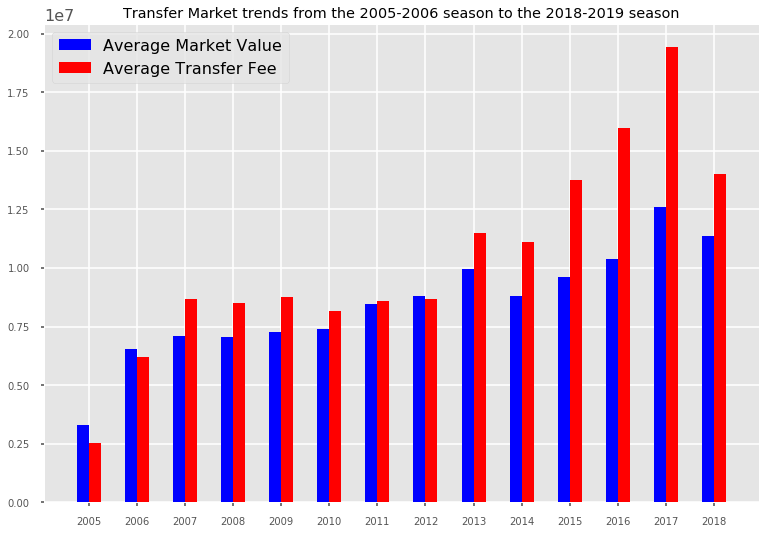

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import random
from numpy import sqrt, abs, round
from scipy import stats 
plt.style.use('seaborn-poster')
plt.style.use('ggplot')



N = 14
Market_value = (3312500,6551827,7078588,7048800,7255823,7377346,8443975,8784274,9937700,8807113,9606754,10384072,12586475,11369387)


fig, ax = plt.subplots()
#margin = 0.05
width=0.25             # the width of the bars

ind = np.arange(14)    # the x locations for the groups
                         
p1 = ax.bar(ind, Market_value, width, bottom=0,color="b")


Transfer_fee = (2508981,6196144,8656210,8494880,8758112,8174488,8575220,8677741,11514880,11090284,13773830,15997688,19459754,14023142)
p2 = ax.bar(ind +width, Transfer_fee, width, bottom=0,color='red')

ax.set_title('Transfer Market trends from the 2005-2006 season to the 2018-2019 season')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018'))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.legend((p1[0], p2[0]), ('Average Market Value', 'Average Transfer Fee'))


ax.autoscale_view()

plt.show()

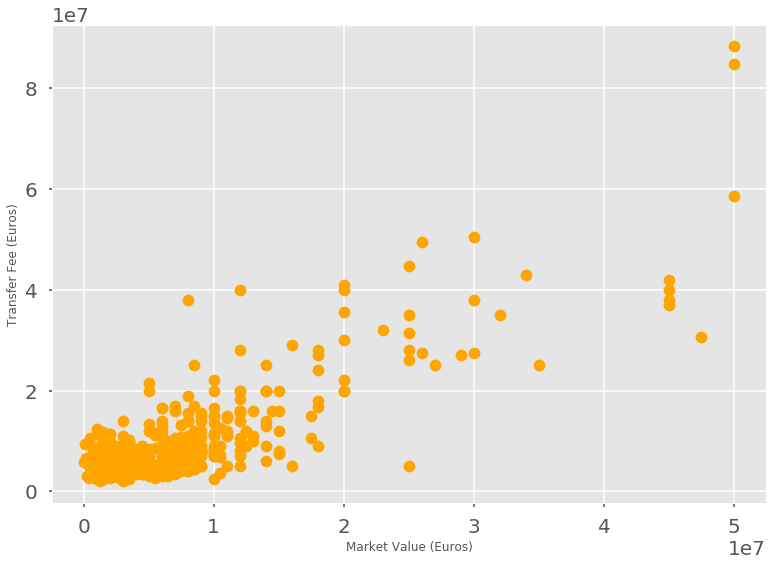

In [16]:
df=pd.read_csv('/Users/apple/Documents/IDS_project/cleaned_dataset1.csv')
sample=df.sample(n=400)
plt.scatter(sample['Market_value'],sample['Transfer_fee'],color='orange')
plt.xlabel("Market Value (Euros)")
plt.ylabel("Transfer Fee (Euros)")
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

Text(0.5, 1.0, '             Box plot of market values from the 5 biggest leagues in the world')

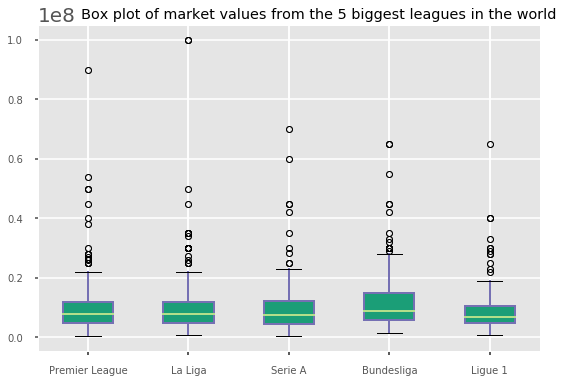

In [14]:
PL=list()
la_liga=list()
serie_a=list()
bundesliga=list()
ligue_1=list()
i=0

while(i<len(df["League_from"])):
    if (df["League_from"][i]=="Premier League"):
        PL.append(df["Market_value"][i])
    elif (df["League_from"][i]=="Ligue 1"):
        ligue_1.append(df["Market_value"][i])
    elif (df["League_from"][i]=="LaLiga"):
        la_liga.append(df["Market_value"][i])
    elif (df["League_from"][i]=="1.Bundesliga"):
        bundesliga.append(df["Market_value"][i])
    elif (df["League_from"][i]=="Serie A"):
        serie_a.append(df["Market_value"][i])
    i=i+1
p=random.sample(PL,200)
ll=random.sample(la_liga,200)
sa=random.sample(serie_a,200)
b=random.sample(bundesliga,200)
l1=random.sample(ligue_1,200)
    
data_to_plot = [p,ll,sa,b,l1]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

bp = ax.boxplot(data_to_plot, patch_artist=True)

for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['Premier League', 'La Liga', 'Serie A', 'Bundesliga','Ligue 1'])
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_title('             Box plot of market values from the 5 biggest leagues in the world')






In [15]:
#Correlation Analysis

df.corr(method='pearson')



,Unnamed: 0,Age,Market_value,Transfer_fee
Unnamed: 0,1.000000,-0.017320,0.168521,0.258133
Age,-0.017320,1.000000,0.147800,-0.010032
Market_value,0.168521,0.147800,1.000000,0.832257
Transfer_fee,0.258133,-0.010032,0.832257,1.000000


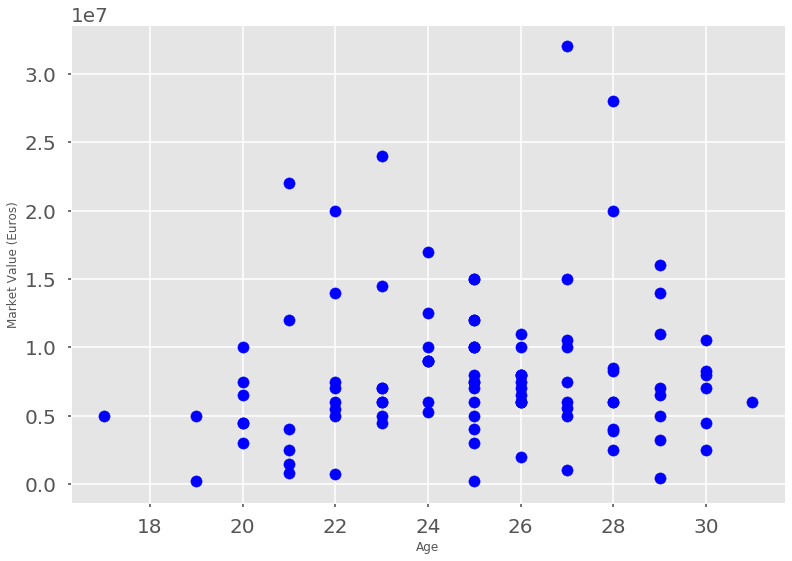

In [12]:
sample2=df.sample(n=100)
plt.scatter(sample2['Age'],sample2['Market_value'],color='blue')
plt.xlabel("Age")
plt.ylabel("Market Value (Euros)")
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

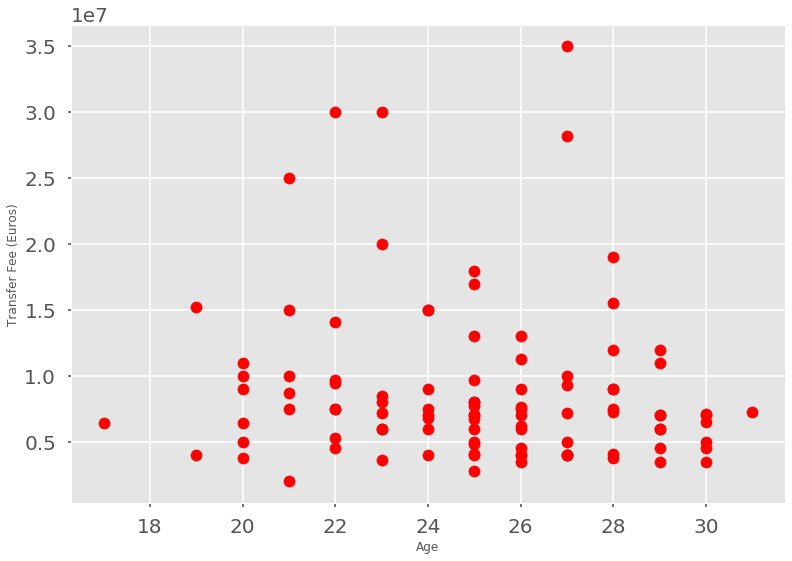

In [13]:
plt.scatter(sample2['Age'],sample2['Transfer_fee'],color='red')
plt.xlabel("Age")
plt.ylabel("Transfer Fee (Euros)")
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

In [14]:
#Hypothesis Testing
def Rand(start, end, num): 
    res = []
    for j in range(num): 
        res.append(random.randint(start, end))
    return res 
print("H0 : Sample mean = Population mean")
print("H1 : Sample mean != Population mean")
mean_p=df['Market_value'].mean()
std_p=df['Market_value'].std()
print('population mean :',mean_p)
l=Rand(1,3330,100)
mean_s=0
for i in l:
    mean_s+=df['Market_value'][i]
mean_s=mean_s/len(l)
print("sample mean : ",mean_s)
st=std_p/(np.sqrt(1000))
zstat=(mean_s-mean_p)/st
print(len(l))
print("z score : ",zstat)
if zstat<1.96 and zstat>-1.96:
    print("H0 is plausible")
else:
    print("H0 must be rejected")

H0 : Sample mean = Population mean
H1 : Sample mean != Population mean
population mean : 8674930.910183238
sample mean :  8627500.0
100
z score :  -0.17029381171091293
H0 is plausible
